In [23]:
! pip install quantiphy==1.1.0

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.8/47.8 KB 2.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for quantiphy: filename=quantiphy-1.1.0-py3-none-any.whl size=24524 sha256=b0c35702c8fe5214e9bb4cb375569f3ea0069b7fd73288da935f4ce85be2743e
  Stored in directory: /users/hope/.cache/pip/wheels/73/ce/c6/41bc7ae7b74ecfabedebe8a7c620e3e8cd55bf24f736a77f63
Successfully built quantiphy
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
from quantiphy import Quantity
plt.rcParams["figure.figsize"] = [10, 6]
# Set up with a higher resolution screen (useful on Mac)
%config InlineBackend.figure_format = 'retina'

In [2]:
# All the observations between Jan_2020_to_March_2021
#observations = pd.read_csv('observations_Jan_2020_to_March_2021.csv')

# All the non science observations
non_science_observations = pd.read_csv('Non_science_observations_Jan_2020_to_March_2021.csv')

# All the science continuum observations
science_continuum_observations = pd.read_csv('science_continuum_observations_Jan_2020_to_March_2021.csv')

In [3]:
# All the observations between Jan_2020_to_March_2021
observations = pd.read_csv('all_obs.csv')

In [4]:
print('All observations : ',observations.CaptureBlockId.count())
print('Non science observations: ',non_science_observations.CaptureBlockId.count())
print('Science Continuum observations : ',science_continuum_observations.CaptureBlockId.count())

All observations :  2698
Non science observations:  6848
Science Continuum observations :  1392


In [5]:
# confirm all science continuum obseravtions is in all observations
#sum(science_continuum_observations['CaptureBlockId'].isin(observatiions['CaptureBlockId']).astype(int))

In [6]:
observations.columns # read columns

Index(['KatpointTargets', 'ProposalId', 'StartTime', 'CaptureBlockId',
       'Description', 'Duration', 'CAS.ProductTransferStatus', 'Public',
       'NumFreqChannels', 'Targets', 'MinFreq', 'MaxFreq'],
      dtype='object')

In [7]:
science_continuum_observations.columns # read columns

Index(['ProposalId', 'CaptureBlockId', 'Description', 'Duration',
       'CAS.ProductTransferStatus', 'Public', 'NumFreqChannels', 'Targets',
       'MinFreq', 'MaxFreq', 'RMSNoise'],
      dtype='object')

In [8]:
observations.head(3) # How the observation data looks like

,KatpointTargets,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq
0,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09
1,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09
2,"J1939-6342 | 1934-638\, radec fluxcal bpcal de...",SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09


total :  2698


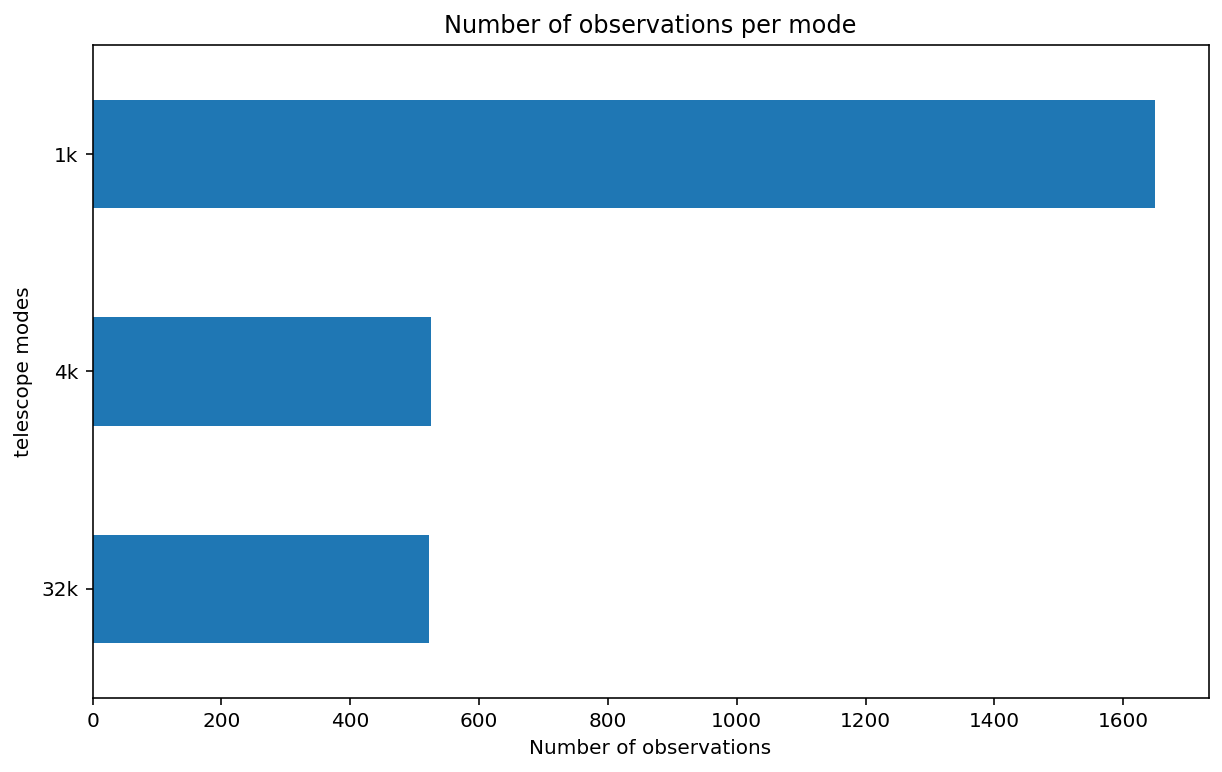

In [9]:
# Different telescope modes
# 32k = 32768 ; 4k = 4096; 1k = 1024

mode_32k_count = observations[observations['NumFreqChannels'] == 32768]['NumFreqChannels'].count() 
mode_4k_count = observations[observations['NumFreqChannels'] == 4096]['NumFreqChannels'].count()  
mode_1k_count = observations[observations['NumFreqChannels'] == 1024]['NumFreqChannels'].count()  

mode_counts = pd.DataFrame(
    {"No_of_observations": [mode_32k_count, mode_4k_count, mode_1k_count]}, 
    index=["32k", "4k", "1k"])

mode_counts['No_of_observations'].plot(kind="barh")
plt.title("Number of observations per mode")
plt.ylabel("telescope modes")
plt.xlabel("Number of observations")

# all add up
print('total : ',mode_1k_count + mode_32k_count + mode_4k_count)

Text(0, 0.5, 'Number of observations')

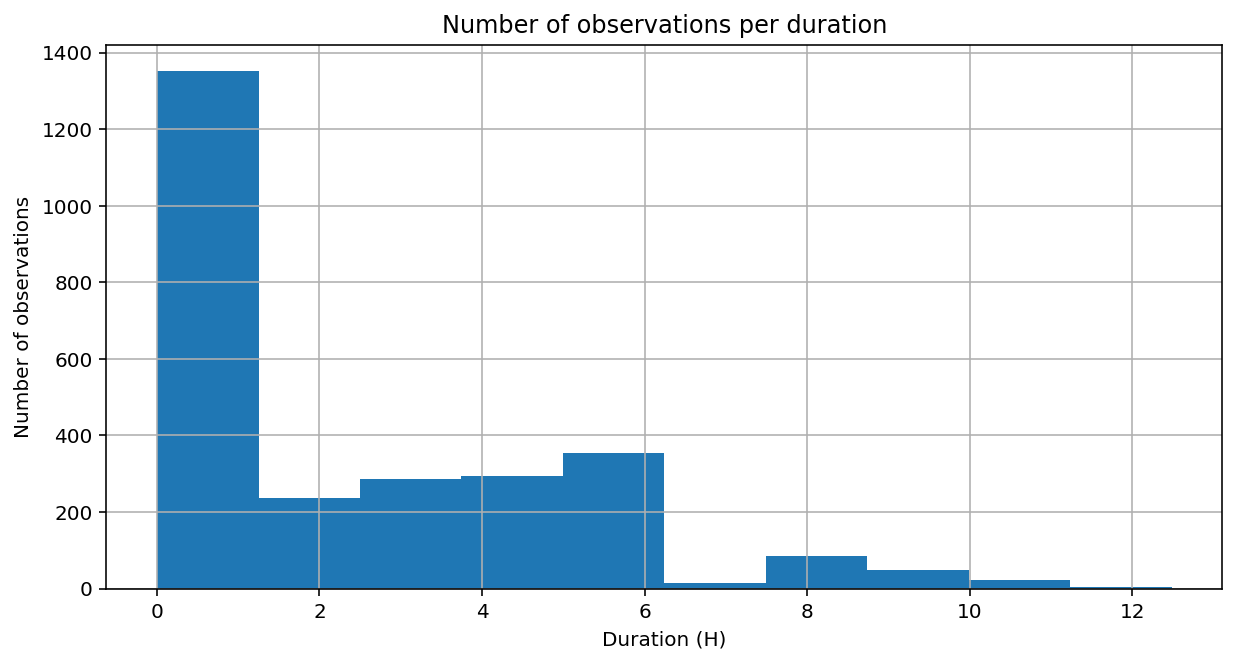

In [10]:
# different observation times
Duration = observations["Duration"]/3600
plt.figure();

Duration.hist(figsize=(10, 5));

plt.title("Number of observations per duration")
plt.xlabel("Duration (H)")
plt.ylabel("Number of observations")

In [11]:
observations.head(3)

,KatpointTargets,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq
0,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09
1,"J0408-6545 | 0408-658\, radec fluxcal bpcal de...",SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09
2,"J1939-6342 | 1934-638\, radec fluxcal bpcal de...",SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09


In [12]:
# Some data wranlging
obs_w_targets_ra_dec = {}
obs_w_targets_calibrators = {}
r = re.compile('.*:.*:.*.')
for ob_i in range(len(observations)): 
    info = observations['KatpointTargets'][ob_i]
    targets = {}
    calibrators = []
    data = info.replace('\\', "").split(',')

    for i in range(int(len(data)/4)):
        
        # check for targets (concatenated w calibrator w |)
        if '|' in data[:4][0] and len(data[:4]) == 4:
            target = data[:4][0].split('|')[0] # first entry is target and calibrator
            calibrator = data[:4][0].split('|')[1]
        elif len(data[:4]) == 4:
            target = data[:4][0] # first entry is target w/o calibrator
        
        elif len(data[:4]) != 4: # check entries are in multiple of 4s
            print(ddata[:4])
            break
        ra = data[:4][-2]
        dec = data[:4][-1]
        
        if r.match(ra) is not None:
            targets[target] = [ra, dec]
        else: 
            break
        calibrators.append(calibrator)
        del data[:4]
        
    obs_w_targets_calibrators[int(observations['CaptureBlockId'][ob_i])] = calibrators
    obs_w_targets_ra_dec[int(observations['CaptureBlockId'][ob_i])] = targets

In [13]:
# Number of projects observed

# Roll-back to PIDs not ProjectGrroup

Project_counts = observations.groupby(['ProposalId']).size()
print(Project_counts)

ProposalId
DDT-20191219-RD-01    3
DDT-20200120-MB-01    2
DDT-20200323-MN-01    5
DDT-20200506-BS-01    9
DDT-20200519-RN-01    3
                     ..
SSV-20201013-SA-01    1
SSV-20201215-SS-01    1
SSV-20210126-SA-01    2
SSV-20210128-SA-01    5
SSV-20210318-SS-01    1
Length: 98, dtype: int64


In [14]:
# frequency names
# UHF band 300 MHz to 1 GHz
# L 1 to 2 GHz
# S 2 to 4 GHz
# C 4 to 8 GHz
# X 8 to 12 GHz 
# Ku 12 to 18 GHz

band_names = {}

for obs_id in range(len(observations)):
    # minimum freq
    Min = observations['MinFreq'][obs_id]
    Max = observations['MaxFreq'][obs_id]
    
    if  Min >= 300e+6 and Max <= 1e+9: band_name ='UHF-band'
    
    elif Min >= 300e+6 and Max <= 2e+9 : band_name = ['UHF-band','L-band']
    
    elif  Min >= 1e+9 and Max <= 4e+9: band_name = ['L-band','S-band']
    
    elif  Min >= 1e+9 and Max <= 2e+9: band_name = 'L-band'
    
    elif  Min > 2e+9 and Max <= 4e+9 : band_name = 'S-band'
    
    elif  Min >= 4e+9 and Max <= 8e+9: band_name = ['S-band','C-band']
        
    elif  Min > 4e+9 and Max <= 8e+9: band_name = 'C-band'
    
    elif  Min > 8e+9 and Max <= 12e+9 : band_name = 'X-band'
    elif  Min >= 8e+9 and Max <= 18e+9: band_name = ['X-band','Ku-band']
    
    elif  Min > 12e+9 and Max <= 18e+9: band_name = 'Ku-band'

    band_names[observations['CaptureBlockId'][obs_id]] = band_name

In [15]:
len(band_names)

2698

In [18]:
# Add column for ra/dec
observations['Targets_ra/dec'] = observations['CaptureBlockId'].map(obs_w_targets_ra_dec)
observations['calibrators'] = observations['CaptureBlockId'].map(obs_w_targets_calibrators)
observations['FreqBand'] = observations['CaptureBlockId'].map(band_names)

observations.drop('KatpointTargets', inplace=True, axis=1)

In [19]:
observations.head(3)

,ProposalId,StartTime,CaptureBlockId,Description,Duration,CAS.ProductTransferStatus,Public,NumFreqChannels,Targets,MinFreq,MaxFreq,Targets_ra/dec,calibrators,FreqBand
0,SCI-20180516-EB-01,2021-03-31T18:02:53Z,1617213676,MHONGOOSE J1337-28 rising 1,20163.39,SPOOLED,NaN,32768,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",1.336500e+09,1.443500e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","[ 0408-658, 1127-145, 3C283, 3C283]","[UHF-band, L-band]"
1,SCI-20180516-EB-01,2021-03-31T18:02:45Z,1617213673,MHONGOOSE J1337-28 rising 1,20167.47,SPOOLED,NaN,4096,"J0408-6545,0408-658,J1130-1449,1127-145,J1311-...",8.560000e+08,1.712000e+09,"{'J0408-6545 ': [' 4:08:20.38', ' -65:45:09.1'...","[ 0408-658, 1127-145, 3C283, 3C283]","[UHF-band, L-band]"
2,SCI-20210212-MP-01,2021-03-31T01:35:19Z,1617154503,Probing star-planet interaction in the Proxima...,1767.25,SPOOLED,NaN,4096,"J1939-6342,1934-638,J1424-4913,1421-490,Proxim...",8.560000e+08,1.712000e+09,"{'J1939-6342 ': [' 19:39:25.03', ' -63:42:45.6...","[ 1934-638, 1421-490, 1421-490]","[UHF-band, L-band]"


In [18]:
#observation_types_index

In [22]:
writer = pd.ExcelWriter('observations_1_Jan_2020_31_March_2021.xlsx',engine='xlsxwriter')
observations.to_excel(writer,sheet_name='observations')
writer.save()